Data Collection | Preprocessing

In [143]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [144]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [145]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/home/pyarena/code for DL/potato_disease/archive(2)/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [146]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [147]:
len(dataset)

68

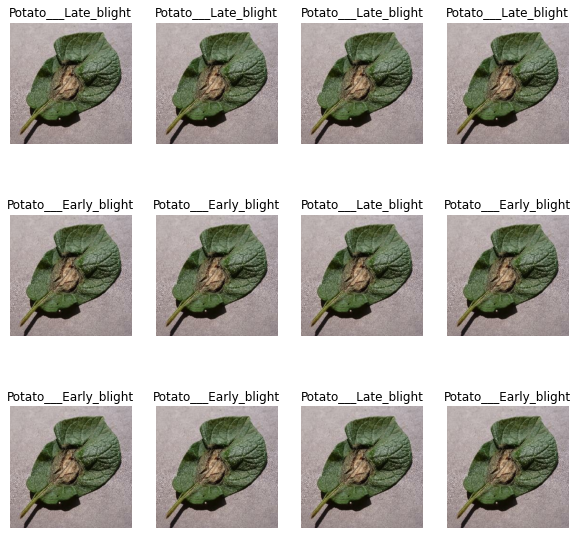

In [148]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

Train Test Split

In [149]:
len(dataset)

68

80% ==> training 
20% ==> 10% validation, 10% test

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [151]:
train_ds =dataset.take(54)
len(train_ds)

54

In [152]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [153]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [155]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [156]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split = 0.1, shuffle=True, shuffle_size = 10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [157]:
len(train_ds)

54

In [158]:
len(val_ds)

6

In [159]:
len(test_ds)

8

In [161]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)